In [81]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import glob
from PIL import Image


In [59]:
plt.rcParams['figure.figsize'] = [12, 8]


In [116]:
# path: path to folder of images
def get_formatted_images(path, cnt):
    image_list = []
    for idx, file_name in enumerate(glob.glob(path + '/*.png')):
        if idx >= cnt:
            break

        img = np.array(Image.open(file_name))

        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
        elif len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        h, w, d = img.shape
        min_dim = min(h, w)
        img = img[0:min_dim, 0:min_dim]

        image_list.append(img)
    return image_list

def get_labels(images, label):
    labels = [label] * len(images)
    return labels

(25, 100, 100, 3)


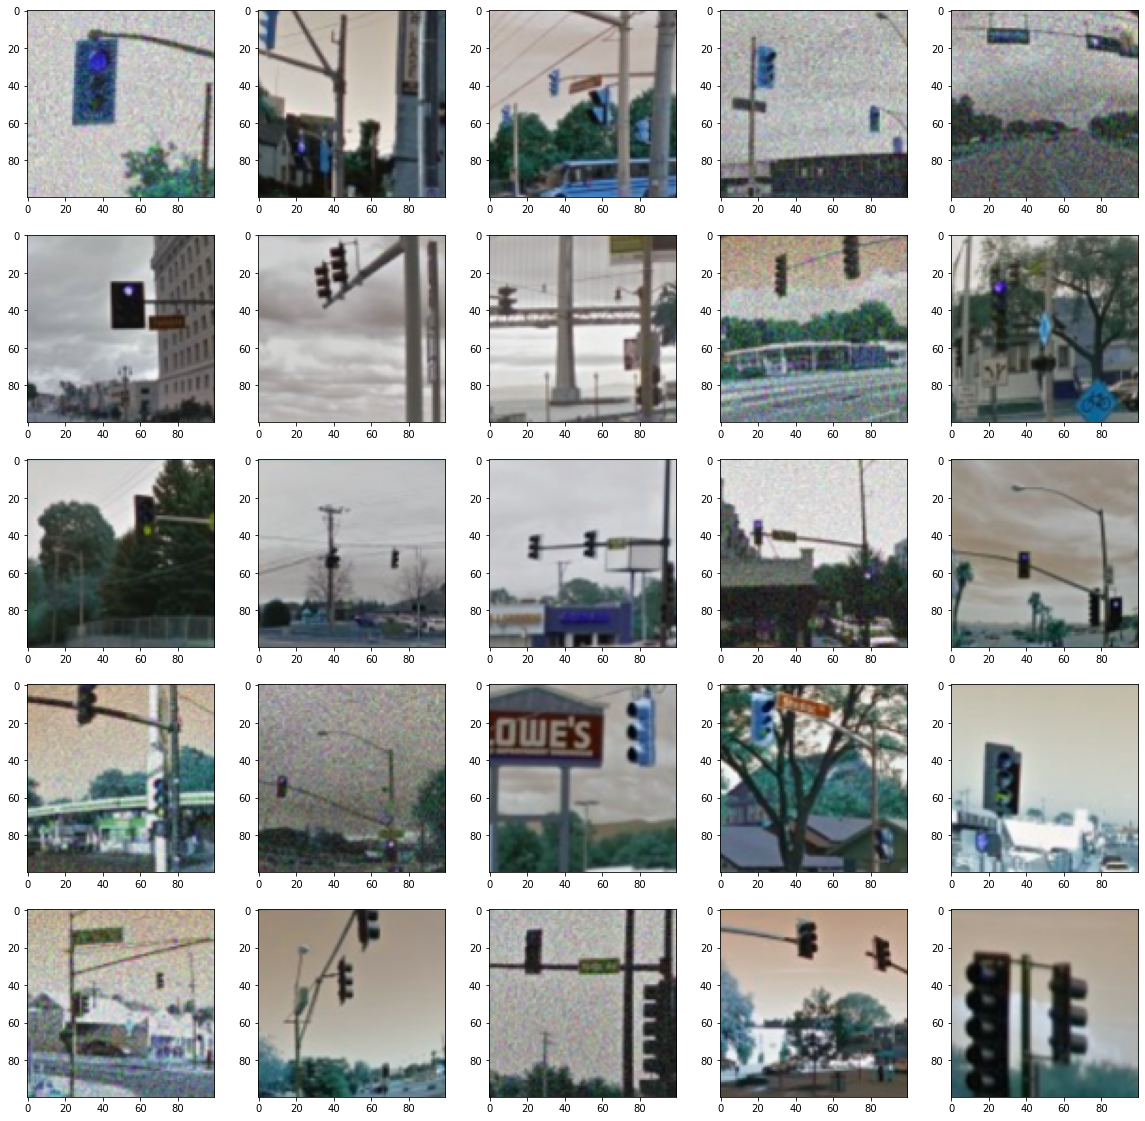

In [178]:
# from helper import get_formatted_images, get_labels

picture = 'Traffic Light'

#path = 'G:\\My Drive\\School\\6. Spring 2022\\EE379K - COMPUTER VISION\\CAPTCHA Solver\\archive\\Recaptcha Dataset\\Bicycle'
path = '/Users/andrewwhitaker/Downloads/Recaptcha Dataset/' + picture

num_imgs = 100
plt.figure(figsize=(20, 20))

# bicycle:
images = get_formatted_images(path, cnt=num_imgs)
labels = get_labels(images, picture)
test_images = []

for i, img in enumerate(images[:25]):
    dim = (100, 100)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    test_images.append(resized)
    plt.subplot(5, 5, i+1)
    plt.imshow(resized, cmap='gray')

test_images = np.array(test_images)
print(test_images.shape)
    

In [61]:
batch_size = 32
img_height = 100
img_width = 100

#data_dir = 'G:\\My Drive\\School\\6. Spring 2022\\EE379K - COMPUTER VISION\\CAPTCHA Solver\\archive\\Recaptcha Dataset'
data_dir = '/Users/andrewwhitaker/Downloads/Recaptcha Dataset/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=53,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=53,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 238399 files belonging to 17 classes.
Using 190720 files for training.
Found 238399 files belonging to 17 classes.
Using 47679 files for validation.


In [127]:
train_ds.class_names

['Bicycle',
 'Boat',
 'Bridge',
 'Bus',
 'Car',
 'Chimney',
 'Crosswalk',
 'Hydrant',
 'Motorcycle',
 'Mountain',
 'Palm',
 'Stairs',
 'Taxi',
 'Tow Truck',
 'Traffic Light',
 'Traffic Sign',
 'Truck']

In [128]:
num_classes = len(train_ds.class_names)

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [129]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [130]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1
)

5960/5960 [==============================] - 215s 36ms/step - loss: 0.3800 - accuracy: 0.8880 - val_loss: 0.2642 - val_accuracy: 0.9179


In [132]:
test_images_2 = np.array(test_images)
test_images_2.shape

(10, 100, 100, 3)

In [133]:
print(test_images)


[[[[111 156 160]
   [ 99 145 150]
   [ 67 108 113]
   ...
   [ 82  83  85]
   [ 90  93  92]
   [ 94  98  96]]

  [[116 159 162]
   [111 156 159]
   [ 99 138 142]
   ...
   [ 98  97 100]
   [112 113 113]
   [117 120 118]]

  [[134 172 175]
   [132 172 175]
   [134 170 173]
   ...
   [100  98 102]
   [110 111 112]
   [113 116 115]]

  ...

  [[ 81  63  48]
   [ 73  53  38]
   [ 68  45  30]
   ...
   [148 128 132]
   [152 133 137]
   [147 132 135]]

  [[ 61  46  32]
   [ 65  45  32]
   [ 70  49  34]
   ...
   [124 105 111]
   [126 109 114]
   [121 107 111]]

  [[ 63  50  38]
   [ 66  49  38]
   [ 76  58  46]
   ...
   [102  87  94]
   [106  93  99]
   [108  97 102]]]


 [[[129 138 151]
   [135 143 154]
   [136 144 153]
   ...
   [ 59  63  68]
   [ 57  60  69]
   [ 62  66  78]]

  [[119 128 140]
   [123 132 142]
   [128 134 144]
   ...
   [ 60  64  69]
   [ 66  69  78]
   [ 69  72  83]]

  [[117 126 139]
   [118 127 138]
   [125 132 142]
   ...
   [ 62  65  70]
   [ 63  66  74]
   [ 62  65

['Bicycle', 'Boat', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Palm', 'Stairs', 'Taxi', 'Tow Truck', 'Traffic Light', 'Traffic Sign', 'Truck']
Car


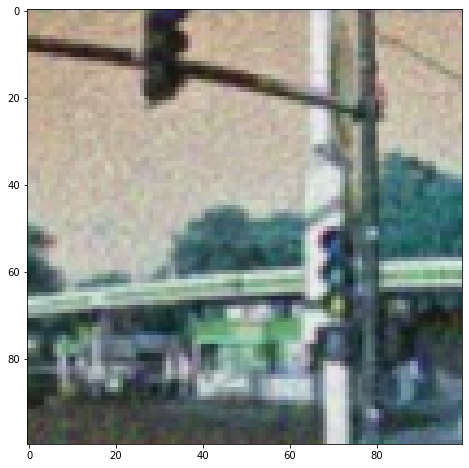

In [209]:
predictions = model.predict(test_images)
print(train_ds.class_names)

rand_idx = int(np.random.random() * len(test_images))

plt.imshow(test_images[rand_idx])
print(f"{train_ds.class_names[np.argmax(predictions[rand_idx])]}")

In [208]:
model.save('test_model.h5')